In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cvxpy as cvx
from sklearn.metrics import mean_absolute_error as mae
import random

import sys
sys.path.append('/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/signal_decompositions/')
from utils import plot_decomp

from solardatatools.osd_signal_decompositions import l2_l1d1_l2d2p365 as osd_sd
from solardatatools.signal_decompositions import l2_l1d1_l2d2p365 as cvx_sd

# `l2_l1d1_l2d2`

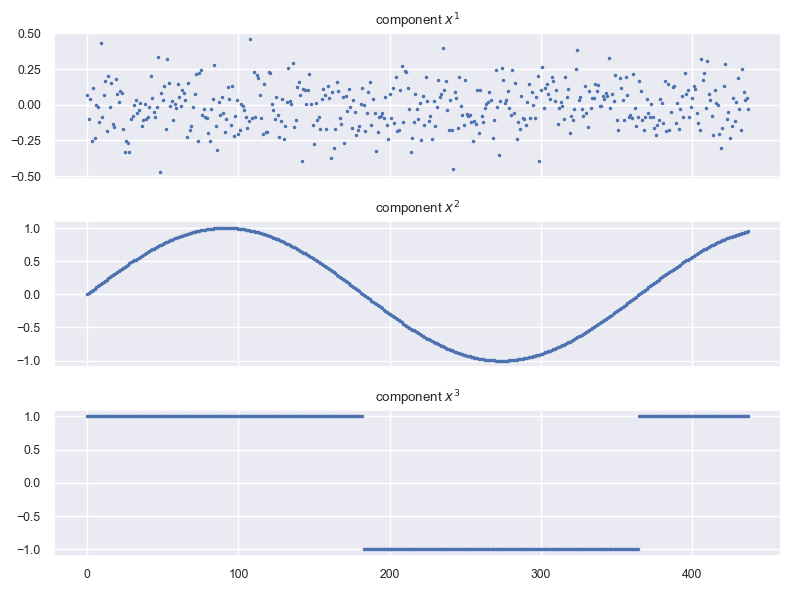

In [37]:
np.random.seed(12) 
random.seed(10)
t = np.arange(365*1.2)

signal2 = np.sin(2 * np.pi * t * 1 / (365.))  
signal3 = signal.square(2 * np.pi * t * 1 / (365.)) 
signal1 = 0.15 * np.random.randn(len(signal2))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

Data with missing values

In [38]:
indices_full = list(range(len(X_real[1])))
# select 20% randomly
indices_20perc = np.random.choice(indices_full, 200, replace=False)

X_real_80perc = X_real.copy()
y_80perc = y.copy()

X_real_80perc[0][indices_20perc] = np.nan
X_real_80perc[1][indices_20perc] = np.nan
X_real_80perc[2][indices_20perc] = np.nan
y_80perc[indices_20perc] = np.nan

Data with missing chunks

In [39]:
indices_chunks_start = np.random.choice(indices_full, 5, replace=False)
X_real_chunks= X_real.copy()
y_chunks = y.copy()

for e in indices_chunks_start:
    for i in range(e, e+25):
        X_real_chunks[0][i] = np.nan
        X_real_chunks[1][i] = np.nan
        X_real_chunks[2][i] = np.nan
        y_chunks[i] = np.nan

# Tests

CVXPY objective       96.58954
OSD objective, scaled 96.58946
s_hat MAE (OSD,CVX)   1.29e-05
s_seas MAE (OSD,CVX)   1.19e-05


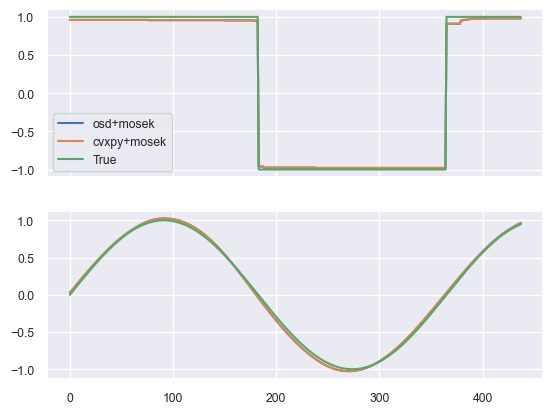

In [47]:
w_osd = { 'w0' : 5,
          'w1' : 10,
          'w2' : 5e5
          }
w_cvx = { 'c0' : 5,
          'c1' : 10,
          'c2' : 5e5
          }

osd_output = osd_sd(y, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y, **w_cvx, solver="MOSEK")

print(f's_hat MAE (OSD,CVX)   {mae(osd_output[0], cvxpy_output[0]):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(osd_output[1], cvxpy_output[1]):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(osd_output[0], label="osd+mosek")
ax1.plot(cvxpy_output[0], label="cvxpy+mosek")
ax1.plot(X_real[2], label="True")
ax2.plot(osd_output[1], label="osd+mosek")
ax2.plot(cvxpy_output[1], label="cvxpy+mosek")
ax2.plot(X_real[1], label="True")
ax1.legend();

CVXPY objective       74.91675
OSD objective, scaled 74.91647
s_hat MAE (OSD,CVX)   2.37e-05
s_seas MAE (OSD,CVX)   2.41e-05


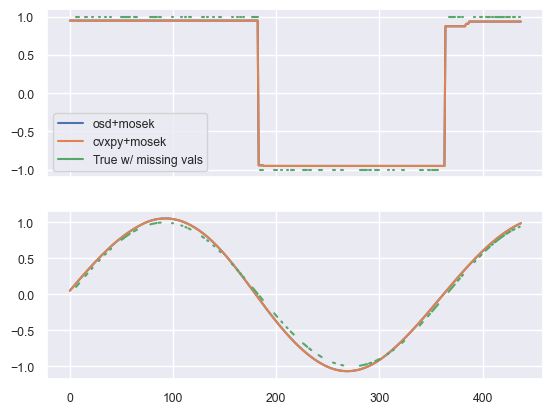

In [43]:
w_osd = { 'w0' : 5,
          'w1' : 10,
          'w2' : 5e5
          }
w_cvx = { 'c0' : 5,
          'c1' : 10,
          'c2' : 5e5
          }

osd_output = osd_sd(y_80perc, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y_80perc, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y_80perc, **w_cvx, solver="MOSEK")

print(f's_hat MAE (OSD,CVX)   {mae(osd_output[0], cvxpy_output[0]):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(osd_output[1], cvxpy_output[1]):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(osd_output[0], label="osd+mosek")
ax1.plot(cvxpy_output[0], label="cvxpy+mosek")
ax1.plot(X_real_80perc[2], label="True w/ missing vals")
ax2.plot(osd_output[1], label="osd+mosek")
ax2.plot(cvxpy_output[1], label="cvxpy+mosek")
ax2.plot(X_real_80perc[1])
ax1.legend();

CVXPY objective       84.29073
OSD objective, scaled 84.29058
s_hat MAE (OSD,CVX)   4.10e-06
s_seas MAE (OSD,CVX)   6.97e-06


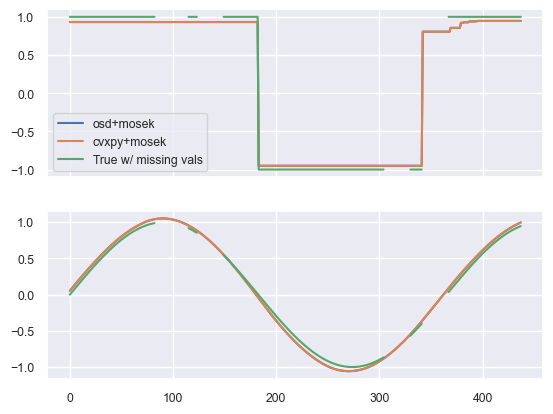

In [49]:
w_osd = { 'w0' : 5,
          'w1' : 10,
          'w2' : 5e5
          }
w_cvx = { 'c0' : 5,
          'c1' : 10,
          'c2' : 5e5
          }

osd_output = osd_sd(y_chunks, **w_osd, solver="MOSEK")
cvxpy_output = cvx_sd(y_chunks, **w_cvx, solver="MOSEK", comp_osd=osd_output) # for osd scaling

cvxpy_output = cvx_sd(y_chunks, **w_cvx, solver="MOSEK")

print(f's_hat MAE (OSD,CVX)   {mae(osd_output[0], cvxpy_output[0]):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(osd_output[1], cvxpy_output[1]):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(osd_output[0], label="osd+mosek")
ax1.plot(cvxpy_output[0], label="cvxpy+mosek")
ax1.plot(X_real_chunks[2], label="True w/ missing vals")
ax2.plot(osd_output[1], label="osd+mosek")
ax2.plot(cvxpy_output[1], label="cvxpy+mosek")
ax2.plot(X_real_chunks[1])
ax1.legend();